In [1]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk("./Curvas"):
    f.extend(filenames)
    break
    
fcandidatos = []
for (dirpath, dirnames, filenames) in walk("./CurvasCandidatos/"):
    fcandidatos.extend(filenames)
    break
len(f)

7812

In [14]:
f

['kplr005340644-20160128150956_dvt.fits',
 'kplr005438757-20160128150956_dvt.fits.1',
 'kplr012168280-20160128150956_dvt.fits',
 'kplr010960995-20160128150956_dvt.fits',
 'kplr009291368-20160128150956_dvt.fits',
 'kplr008029848-20160128150956_dvt.fits',
 'kplr009334289-20160128150956_dvt.fits.1',
 'kplr012470954-20160128150956_dvt.fits',
 'kplr007021177-20160128150956_dvt.fits',
 'kplr009899514-20160128150956_dvt.fits',
 'kplr010462462-20160128150956_dvt.fits',
 'kplr006387887-20160128150956_dvt.fits',
 'kplr006205460-20160128150956_dvt.fits',
 'kplr011867733-20160128150956_dvt.fits',
 'kplr011450414-20160128150956_dvt.fits.1',
 'kplr008494142-20160128150956_dvt.fits',
 'kplr005112567-20160128150956_dvt.fits',
 'kplr008211521-20160128150956_dvt.fits',
 'kplr011152950-20160128150956_dvt.fits',
 'kplr006891512-20160128150956_dvt.fits',
 'kplr003939150-20160128150956_dvt.fits',
 'kplr005725851-20160128150956_dvt.fits',
 'kplr009592579-20160128150956_dvt.fits',
 'kplr002711114-201601281509

hay archivos repetidos.. Varias observaciones por un objeto.

In [2]:
archivos_norepetidos = [archivo for archivo in f if "fits." not in archivo]
archivos_norepetidos_candidatos = [archivo for archivo in fcandidatos if "fits." not in archivo]

print("Archivos no repetidos: ",len(archivos_norepetidos))
print("Archivos no repetidos en candidatos: ",len(archivos_norepetidos_candidatos))

Archivos no repetidos:  6924
Archivos no repetidos en candidatos:  0


## Metadatos:

In [5]:
#Metadatos
import pandas as pd
import numpy as np
df2 = pd.read_csv("Datos/kepler_koi_search.txt")
df2.drop(0,axis=0,inplace=True)
#df.dropna(subset=["DV Summary"],inplace=True) #los que de partida no tenian fits
df2.head()

,Kepler ID,KOI Name,Kepler Name,Kepler Disposition,NExScI Disposition,RA (J2000),Dec (J2000),Time of Transit Epoch,Period,Transit Depth,...,DV Summary,Transit Flag,Secondary Flag,Offset Flag,Contamination Flag,Disposition Score,Teq.1,Stellar Radius.1,Stellar Mass.1,Age.1
1,757450,K00889.01,Kepler-75 b,CANDIDATE,CONFIRMED,19 24 33.024,+36 34 38.57,169.991686,8.884922995,16053.4,...,/missions/kepler/dv_files/0007/000757450/kplr0...,0,0,0,0,0.999,770,0.843,0.821,NaN
2,892772,K01009.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 36.811,+36 40 43.83,357.53594,5.09246539,254.0,...,/missions/kepler/dv_files/0008/000892772/kplr0...,0,0,1,0,0,844,0.751,0.727,NaN
3,1025986,K07621.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 08.086,+36 46 15.75,315.2486,275.07365,228.9,...,/missions/kepler/dv_files/0010/001025986/kplr0...,1,0,0,0,0,303,1.187,0.864,NaN
4,1026032,K06252.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 10.577,+36 43 45.38,133.7744903,8.460438928,76412.9,...,/missions/kepler/dv_files/0010/001026032/kplr0...,0,1,0,0,0,804,0.702,0.796,NaN
5,1026957,K00958.01,NaN,CANDIDATE,CANDIDATE,19 25 01.078,+36 44 37.00,166.540438,21.76129812,1300.7,...,/missions/kepler/dv_files/0010/001026957/kplr0...,0,0,0,0,1,486,0.720,0.781,NaN


In [119]:
df["NExScI Disposition"].value_counts()

FALSE POSITIVE    3976
CONFIRMED         2281
CANDIDATE         1797
Name: NExScI Disposition, dtype: int64

In [116]:
df.shape

(8054, 48)

In [127]:
df["Kepler ID"].unique().shape

(6923,)

In [ ]:
#revisar aqui

In [12]:
df2[df2["KOI Name"].str.contains("K05447")]

,Kepler ID,KOI Name,Kepler Name,Kepler Disposition,NExScI Disposition,RA (J2000),Dec (J2000),Time of Transit Epoch,Period,Transit Depth,...,DV Summary,Transit Flag,Secondary Flag,Offset Flag,Contamination Flag,Disposition Score,Teq.1,Stellar Radius.1,Stellar Mass.1,Age.1
4802,7935997,K05447.01,NaN,FALSE POSITIVE,FALSE POSITIVE,18 40 49.584,+43 46 27.44,321.7790604,322.55663046,NaN,...,NaN,1,0,0,0,NaN,NaN,NaN,NaN,NaN
4803,7935997,K05447.02,Kepler-1629 b,FALSE POSITIVE,CONFIRMED,18 40 49.584,+43 46 27.44,134.84758,3.87594316,58.6,...,/missions/kepler/dv_files/0079/007935997/kplr0...,1,0,0,0,0,1081,0.893,1.010,NaN


In [12]:
from astropy.table import Table
Table.from_pandas(aux)

Kepler ID,KOI Name,Kepler Name,Kepler Disposition,NExScI Disposition,RA (J2000),Dec (J2000),Time of Transit Epoch,Period,Transit Depth,Duration,Ingress Duration,Impact Parameter,Inclination,Semi-major Axis,Eccentricity,Long of Periastron,r/R,a/R,Planet Radius,Teq,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Age,Provenance,Quarters,Transit Number,KOI count,Binary Discrimination,Transit Model,Transit Model SNR,Transit Model DOF,Transit Model chisq,Last vet Update,DV Report,DV Summary,Transit Flag,Secondary Flag,Offset Flag,Contamination Flag,Disposition Score,Teq.1,Stellar Radius.1,Stellar Mass.1,Age.1
str7,str9,str11,str9,str9,str12,str12,str9,str17,str5,str5,bytes1,str5,str6,str5,str3,bytes1,str5,str6,str5,str4,str4,str5,str6,str5,str5,bytes1,str19,str32,str3,str1,str5,str34,str4,bytes1,bytes1,str19,str77,str80,str1,str1,str1,str1,str5,str4,str5,str5,bytes1
5301750,K01589.01,Kepler-84 b,CANDIDATE,CONFIRMED,19 53 00.490,+40 29 45.88,138.76838,8.725854780000001,446.7,4.473,--,0.911,82.520,0.083,0.0,--,0.023,7.000,2.860,985,6036,4.326,-0.180,1.131,0.987,--,q1_q17_dr25_stellar,11111111111111111000000000000000,155,5,0.039,Mandel and Agol (2002 ApJ 580 171),37.7,--,--,2017-05-10 00:00:00,/missions/kepler/dv_files/0053/005301750/kplr005301750-20160209194854_dvr.pdf,/missions/kepler/dv_files/0053/005301750/kplr005301750-01-20160209194854_dvs.pdf,0,0,0,0,0.998,985,1.131,0.987,--
5301750,K01589.02,Kepler-84 c,CANDIDATE,CONFIRMED,19 53 00.490,+40 29 45.88,135.18736,12.88291395,460.5,5.676,--,0.962,81.130,0.107,0.0,--,0.026,6.240,3.150,865,6036,4.326,-0.180,1.131,0.987,--,q1_q17_dr25_stellar,11111111111111111000000000000000,103,5,0.951,Mandel and Agol (2002 ApJ 580 171),33.6,--,--,2017-05-10 00:00:00,/missions/kepler/dv_files/0053/005301750/kplr005301750-20160209194854_dvr.pdf,/missions/kepler/dv_files/0053/005301750/kplr005301750-02-20160209194854_dvs.pdf,0,0,0,0,1,865,1.131,0.987,--
5301750,K01589.03,Kepler-84 e,CANDIDATE,CONFIRMED,19 53 00.490,+40 29 45.88,145.12322,27.4345973,472.6,5.038,--,0.603,88.990,0.177,0.0,--,0.021,34.300,2.560,672,6036,4.326,-0.180,1.131,0.987,--,q1_q17_dr25_stellar,11111111111111111000000000000000,48,5,0.628,Mandel and Agol (2002 ApJ 580 171),25.3,--,--,2017-05-10 00:00:00,/missions/kepler/dv_files/0053/005301750/kplr005301750-20160209194854_dvr.pdf,/missions/kepler/dv_files/0053/005301750/kplr005301750-03-20160209194854_dvs.pdf,0,0,0,0,1,672,1.131,0.987,--
5301750,K01589.04,Kepler-84 d,CANDIDATE,CONFIRMED,19 53 00.490,+40 29 45.88,135.42908,4.22453631,159.1,3.128,--,0.823,82.310,0.051,0.0,--,0.013,6.150,1.600,1254,6036,4.326,-0.180,1.131,0.987,--,q1_q17_dr25_stellar,11111111111111111000000000000000,275,5,0.886,Mandel and Agol (2002 ApJ 580 171),16.7,--,--,2017-05-10 00:00:00,/missions/kepler/dv_files/0053/005301750/kplr005301750-20160209194854_dvr.pdf,/missions/kepler/dv_files/0053/005301750/kplr005301750-04-20160209194854_dvs.pdf,0,0,0,0,0.996,1254,1.131,0.987,--
5301750,K01589.05,Kepler-84 f,CANDIDATE,CONFIRMED,19 53 00.490,+40 29 45.88,160.29386,44.5520266,362.1,6,--,0.689,89.070,0.245,0.0,--,0.019,42.600,2.290,572,6036,4.326,-0.180,1.131,0.987,--,q1_q17_dr25_stellar,11111111111111111000000000000000,28,5,0.163,Mandel and Agol (2002 ApJ 580 171),16.7,--,--,2017-05-10 00:00:00,/missions/kepler/dv_files/0053/005301750/kplr005301750-20160209194854_dvr.pdf,/missions/kepler/dv_files/0053/005301750/kplr005301750-05-20160209194854_dvs.pdf,0,0,0,0,0.996,572,1.131,0.987,--


In [46]:
#hacer el match con las descargas...
archivos_descargas = archivos_norepetidos+archivos_norepetidos_candidatos

df["File Name"] = np.zeros(df.shape[0])

cantidad_faltantes = 0
for index,i in zip(df.index.values,range(df.shape[0])):
    fila = df.iloc[i,:]
    
    kepler_name = fila["DV Summary"].split("/")[-2]

    encontro = False
    for archivo_name in archivos_descargas:
        if kepler_name == archivo_name.split("-")[0].split("kplr")[-1]:
            #print("tiene Fits")
            df.loc[index,"File Name"] = archivo_name
            encontro=True
            continue
            
    if not encontro:
        cantidad_faltantes+=1
print("faltantes: ",cantidad_faltantes)

faltantes:  0


### nuevo archivo de datos con el fits asociado

In [6]:
df.to_csv('kepler_dataset.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv("Datos/kepler_dataset.csv")
df.head()

,Kepler ID,KOI Name,Kepler Name,Kepler Disposition,NExScI Disposition,RA (J2000),Dec (J2000),Time of Transit Epoch,Period,Transit Depth,...,Transit Flag,Secondary Flag,Offset Flag,Contamination Flag,Disposition Score,Teq.1,Stellar Radius.1,Stellar Mass.1,Age.1,File Name
0,757450,K00889.01,Kepler-75 b,CANDIDATE,CONFIRMED,19 24 33.024,+36 34 38.57,169.991686,8.884923,16053.4,...,0,0,0,0,0.999,770.0,0.843,0.821,NaN,kplr000757450-20160128150956_dvt.fits
1,892772,K01009.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 36.811,+36 40 43.83,357.535940,5.092465,254.0,...,0,0,1,0,0.000,844.0,0.751,0.727,NaN,kplr000892772-20160128150956_dvt.fits
2,1025986,K07621.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 08.086,+36 46 15.75,315.248600,275.073650,228.9,...,1,0,0,0,0.000,303.0,1.187,0.864,NaN,kplr001025986-20160128150956_dvt.fits
3,1026032,K06252.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 10.577,+36 43 45.38,133.774490,8.460439,76412.9,...,0,1,0,0,0.000,804.0,0.702,0.796,NaN,kplr001026032-20160128150956_dvt.fits
4,1026957,K00958.01,NaN,CANDIDATE,CANDIDATE,19 25 01.078,+36 44 37.00,166.540438,21.761298,1300.7,...,0,0,0,0,1.000,486.0,0.720,0.781,NaN,kplr001026957-20160128150956_dvt.fits


In [3]:
import numpy as np
np.max(df["Period"])

1071.232624

In [9]:
df[pd.isnull(df["a/R"])].shape

(59, 49)

In [6]:
df.columns

Index(['Kepler ID', 'KOI Name', 'Kepler Name', 'Kepler Disposition',
       'NExScI Disposition', 'RA (J2000)', 'Dec (J2000)',
       'Time of Transit Epoch', 'Period', 'Transit Depth', 'Duration',
       'Ingress Duration', 'Impact Parameter', 'Inclination',
       'Semi-major Axis', 'Eccentricity', 'Long of Periastron', 'r/R', 'a/R',
       'Planet Radius', 'Teq', 'Teff', 'log(g)', 'Metallicity',
       'Stellar Radius', 'Stellar Mass', 'Age', 'Provenance', 'Quarters',
       'Transit Number', 'KOI count', 'Binary Discrimination', 'Transit Model',
       'Transit Model SNR', 'Transit Model DOF', 'Transit Model chisq',
       'Last vet Update', 'DV Report', 'DV Summary', 'Transit Flag',
       'Secondary Flag', 'Offset Flag', 'Contamination Flag',
       'Disposition Score', 'Teq.1', 'Stellar Radius.1', 'Stellar Mass.1',
       'Age.1', 'File Name'],
      dtype='object')

In [2]:
columnas =["KOI Name","Period","Transit Depth","Teq","KOI count", "Planet Radius"] #no es mucho tampoco xd
columnas_estrella = ["Teff","log(g)","Metallicity","Stellar Radius","Stellar Mass"]
aux = df.loc[:,columnas]
aux.to_csv("columnas_metadatos.csv",index=False)
aux = df.loc[:,columnas+columnas_estrella]
aux.to_csv("columnas_metadatos_estrella.csv",index=False)

In [4]:
import numpy as np
np.sum((pd.isnull(df["Transit Depth"]))*1)

59

In [2]:
df[pd.isnull(df["Transit Depth"])]

,Kepler ID,KOI Name,Kepler Name,Kepler Disposition,NExScI Disposition,RA (J2000),Dec (J2000),Time of Transit Epoch,Period,Transit Depth,...,Transit Flag,Secondary Flag,Offset Flag,Contamination Flag,Disposition Score,Teq.1,Stellar Radius.1,Stellar Mass.1,Age.1,File Name
241,2850321,K04956.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 23 59.957,+38 00 00.93,143.631600,25.221893,NaN,...,1,0,0,0,0.000,NaN,NaN,NaN,NaN,kplr002850321-20160128150956_dvt.fits
269,2969638,K06298.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 02 55.130,+38 09 53.38,131.901680,1.973622,NaN,...,1,0,0,0,0.000,NaN,NaN,NaN,NaN,kplr002969638-20160128150956_dvt.fits
557,3534118,K03641.02,NaN,FALSE POSITIVE,FALSE POSITIVE,19 13 18.684,+38 37 39.44,217.671826,178.449730,NaN,...,1,1,0,0,0.000,NaN,NaN,NaN,NaN,kplr003534118-20160128150956_dvt.fits
567,3542574,K03628.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 23 26.234,+38 38 11.73,133.750744,3.471400,NaN,...,0,1,0,1,0.000,NaN,NaN,NaN,NaN,kplr003542574-20160128150956_dvt.fits
572,3544678,K06340.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 25 46.274,+38 37 24.89,134.958400,6.376220,NaN,...,0,1,1,0,0.000,NaN,NaN,NaN,NaN,kplr003544678-20160128150956_dvt.fits
1033,4284147,K06402.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 45 56.602,+39 18 45.40,132.217400,1.161102,NaN,...,1,0,0,0,0.029,NaN,NaN,NaN,NaN,kplr004284147-20160128150956_dvt.fits
1173,4587448,K06430.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 50 37.786,+39 39 18.83,131.797300,2.234160,NaN,...,1,0,0,0,0.000,NaN,NaN,NaN,NaN,kplr004587448-20160128150956_dvt.fits
1228,4725292,K06437.01,NaN,FALSE POSITIVE,FALSE POSITIVE,18 54 49.322,+39 52 13.77,132.345280,1.154951,NaN,...,1,0,0,0,0.000,NaN,NaN,NaN,NaN,kplr004725292-20160128150956_dvt.fits
1442,5000179,K06485.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 13 25.987,+40 10 28.78,131.884960,3.632935,NaN,...,1,0,0,0,0.000,NaN,NaN,NaN,NaN,kplr005000179-20160128150956_dvt.fits
1449,5006817,K05112.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 21 49.430,+40 08 44.67,186.326200,94.818136,NaN,...,1,0,0,0,0.000,NaN,NaN,NaN,NaN,kplr005006817-20160128150956_dvt.fits


## Crear nuevo datasets

In [20]:
#csv de etiquetas
state = df["NExScI Disposition"].values
koi_name = df["KOI Name"].values
kepler_name = df["Kepler Name"].values
planet_radius = df["Planet Radius"].values #in georad
stellar_radius = df["Stellar Radius"].values #in solrad
metallicity = df["Metallicity"].values 
#Teq = df["Teq"].values #Equilibrium surface temperature of planet.
stellar_mass = df["Stellar Mass"].values #Units of solar masses

array = [state,koi_name,kepler_name,planet_radius,stellar_radius,metallicity,stellar_mass]
df_labels = pd.DataFrame(list(zip(*array)),columns=["NExScI Disposition","KOI Name"
                        ,"Kepler Name","Planet Radius","Stellar Radius","Metallicity","Stellar Mass"])
df_labels.head()

,NExScI Disposition,KOI Name,Kepler Name,Planet Radius,Stellar Radius,Metallicity,Stellar Mass
0,CONFIRMED,K00889.01,Kepler-75 b,10.510,0.843,-0.080,0.821
1,FALSE POSITIVE,K01009.01,NaN,1.170,0.751,-0.200,0.727
2,FALSE POSITIVE,K07621.01,NaN,1.860,1.187,-0.120,0.864
3,FALSE POSITIVE,K06252.01,NaN,36.620,0.702,-1.060,0.796
4,CANDIDATE,K00958.01,NaN,2.530,0.720,0.000,0.781


In [21]:
df_labels.to_csv('koi_labels.csv', index=False)

In [22]:
#csv de curvas de luz...
import gc
import time
from astropy.io import fits

import csv
b = open('koi_light_curves.csv', 'w') #cambiar "w" por "a"
a = csv.writer(b)

#no crearlo denuevo ya que viene acumulado por la ejecucion anterior
contador = 0

koi_names = df["KOI Name"].values[contador:]
file_names = df["File Name"].values[contador:]

for koi_name,file_name in zip(koi_names,file_names):  
    file = "Curvas/"+file_name
    
    #if contador%500 == 0:
    #a.writerows(array)
    #del array[:]
    #del array
    #array = []
        
    #excepciones debido a que algunos koi no tienen curva de luz asociada
    if koi_name == "K04957.02": #1falsopositivo y un cadidato
        n = 1
    elif koi_name == "K04084.03": #1confirmado 2 candidatos
        n = 2
    elif koi_name == "K02311.03": #3 candidatos
        n=1
    elif koi_name == "K02768.03": #3 candidatos
        n=1
    elif koi_name == "K04288.04": #1 confirmado, 2 candidatos y 1 falso positivo
        n=3
    elif koi_name == "K03184.03": #2 candidatos, 1 falso positivo 
        n = 2
    elif koi_name == "K04676.02": #1 candidato y un falso positivo
        n=1
    elif koi_name == "K02369.03": #1 confirmado y 2 candidatos
        n=2
    elif koi_name == "K02167.03": #2confirmados y 1 candidato
        n=2
    elif koi_name == "K05270.02": #2 falsos positivos
        n=1
    elif koi_name == "K05447.02": #1 falsopositivo y 1 confirmado
        n=1
    elif koi_name == "K04772.03": #2 candidatos y un falso positivo
        n=2
    elif koi_name == "K02473.03": #2 confirmados y un falso positivo
        n=2
    elif koi_name == "K04782.02":
        n=1
    elif koi_name == "K03283.02":
        n=1
    elif koi_name == "K03429.04":
        n=3
    elif koi_name == "K01922.03":
        n=2
    elif koi_name == "K03051.02":
        n=1
    elif koi_name == "K05801.02":
        n=1
    elif koi_name == "K00989.02":
        n=1
    elif koi_name == "K02871.04":
        n=3
    elif koi_name == "K02248.04":
        n=3
    elif koi_name == "K02433.07":
        n=6
    elif koi_name == "K02590.02":
        n=1
    elif koi_name == "K00547.03": #1 confirmado y 2 candidatos
        n=2
    else:
        n = int(koi_name.split(".")[-1])
    
    #tiempo estandarizado asi que no se extrae...
    try:
        datos = fits.getdata(file, n)
        #array.append(datos["LC_WHITE"])
        #np.vstack((aux,datos))
        a.writerow(np.around(datos["LC_WHITE"], decimals=3)) #reduce un pokitito
        
    except:
        print(file_name)
        print("Nombre: ",koi_name)
        #print(extension_n.columns)
        print("El valor de n es: ",n)
        asd
    
    del datos
    gc.collect() 
    
    contador+=1
b.close()

In [18]:
df2[df2["KOI Name"].str.contains("K02473")]

,Kepler ID,KOI Name,Kepler Name,Kepler Disposition,NExScI Disposition,RA (J2000),Dec (J2000),Time of Transit Epoch,Period,Transit Depth,...,DV Summary,Transit Flag,Secondary Flag,Offset Flag,Contamination Flag,Disposition Score,Teq.1,Stellar Radius.1,Stellar Mass.1,Age.1
5877,8753896,K02473.01,Kepler-389 b,CANDIDATE,CONFIRMED,19 27 50.398,+44 54 00.08,132.94014,3.24417541,371.9,...,/missions/kepler/dv_files/0087/008753896/kplr0...,0,0,0,0,1,1047,0.870,0.813,NaN
5878,8753896,K02473.02,NaN,FALSE POSITIVE,FALSE POSITIVE,19 27 50.398,+44 54 00.08,373.2353172,73.45736853,NaN,...,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
5879,8753896,K02473.03,Kepler-389 c,CANDIDATE,CONFIRMED,19 27 50.398,+44 54 00.08,143.8154,14.5123622,355.8,...,/missions/kepler/dv_files/0087/008753896/kplr0...,0,0,0,0,0.9399999999999999,636,0.870,0.813,NaN


In [20]:
gc.collect()

542

In [23]:
print(contador)

8054


Deberia ser 8mil

In [1]:
import pandas as pd
chunks = pd.read_csv("Datos/koi_light_curves.csv",header=None,iterator=True,chunksize=1500) #koi_light_curves


#df2 = pd.concat([chunk[chunk["Algo"]==candidato] for chunk in df])

In [ ]:
from numpy import genfromtxt
my_data = genfromtxt('Datos/koi_light_curves.csv', delimiter=',')
my_data.shape

In [ ]:
import numpy as np
my_data = np.loadtxt('Datos/koi_light_curves.csv', delimiter=',')
my_data.shape

## separar los archivos en 3... (TRAIN/VAL/TEST)

In [2]:
import pandas as pd
import numpy as np
df_labels = pd.read_csv("Datos/koi_labels.csv")
df_labels.head()

,NExScI Disposition,KOI Name,Kepler Name,Planet Radius,Stellar Radius,Metallicity,Stellar Mass
0,CONFIRMED,K00889.01,Kepler-75 b,10.51,0.843,-0.08,0.821
1,FALSE POSITIVE,K01009.01,NaN,1.17,0.751,-0.20,0.727
2,FALSE POSITIVE,K07621.01,NaN,1.86,1.187,-0.12,0.864
3,FALSE POSITIVE,K06252.01,NaN,36.62,0.702,-1.06,0.796
4,CANDIDATE,K00958.01,NaN,2.53,0.720,0.00,0.781


In [3]:
mascara_candidates = df_labels["NExScI Disposition"]=="CANDIDATE"
df_candidates = df_labels[mascara_candidates]
print("Shape de candidatos: ",df_candidates.shape)

('Shape de candidatos: ', (1797, 7))


In [4]:
mascara_ncandidates = df_labels["NExScI Disposition"]!="CANDIDATE"
df_ncandidates = df_labels[mascara_ncandidates]

print("Shape de no candidatos: ",df_ncandidates.shape)

#train/val/test split

mascara_train = np.random.rand(len(df_ncandidates)) <= 0.65 

df_train = df_ncandidates[mascara_train] #60% aprox
df_extra = df_ncandidates[~mascara_train]

mascara_val = np.random.rand(len(df_extra)) < 0.5 

df_val = df_extra[mascara_val]
df_test = df_extra[~mascara_val]
print("Shape de train: ",df_train.shape)
print("Shape de val: ",df_val.shape)
print("Shape de test: ",df_test.shape)

('Shape de no candidatos: ', (6257, 7))
('Shape de train: ', (4044, 7))
('Shape de val: ', (1074, 7))
('Shape de test: ', (1139, 7))


In [7]:
#guardar en csv todos..
df_candidates.to_csv('Datos_split/koi_labels_candidate.csv',index=False)
df_train.to_csv('Datos_split/koi_labels_train.csv',index=False)
df_val.to_csv('Datos_split/koi_labels_val.csv',index=False)
df_test.to_csv('Datos_split/koi_labels_test.csv',index=False)

/home/panshop/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


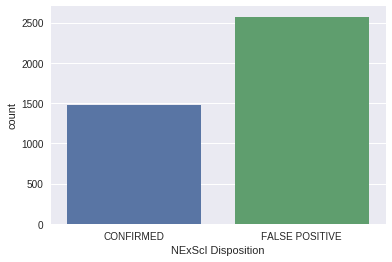

In [5]:
import seaborn as sns
%matplotlib inline
sns.countplot(data=df_train,x='NExScI Disposition')

In [15]:
train_index.shape

(4000,)

In [18]:
train_index

array([   0,    1,    2, ..., 8047, 8051, 8053])

In [16]:
aux.shape

(1501, 7)

In [20]:
aux = df_labels.ix[:,:]
aux.loc[ aux.index.intersection(train_index) ].shape

(4000, 7)

In [6]:
chunks = pd.read_csv("Datos/koi_light_curves.csv",header=None,iterator=True,chunksize=1300) #koi_light_curve

candidates_index = df_candidates.index.values
train_index = df_train.index.values
val_index = df_val.index.values
test_index = df_test.index.values

import gc
file_candidate = open('Datos_split/koi_light_curves_candidate.csv', 'w')
file_train = open('Datos_split/koi_light_curves_train.csv', 'w')
file_val = open('Datos_split/koi_light_curves_val.csv', 'w')
file_test = open('Datos_split/koi_light_curves_test.csv', 'w')

d=1
for chunk in chunks:
    print("Iteracion ",d)
    
    chunk_candidates = chunk.loc[ chunk.index.intersection(candidates_index) ] 
    if len(chunk_candidates)!= 0:
        np.savetxt(file_candidate, chunk_candidates, fmt='%.3f', delimiter=',')
    del chunk_candidates
     
    #train/val/test split    
    chunk_train =  chunk.loc[ chunk.index.intersection(train_index) ] 
    if len(chunk_train)!= 0:
        np.savetxt(file_train, chunk_train, fmt='%.3f', delimiter=',')
    del chunk_train
    
    chunk_val= chunk.loc[ chunk.index.intersection(val_index) ] 
    if len(chunk_val)!= 0:
        np.savetxt(file_val, chunk_val, fmt='%.3f', delimiter=',')
    del chunk_val
    
    chunk_test = chunk.loc[ chunk.index.intersection(test_index) ]
    if len(chunk_test)!= 0:
        np.savetxt(file_test, chunk_test, fmt='%.3f', delimiter=',')
    del chunk_test
    
    gc.collect()
    d+=1
file_candidate.close()
file_train.close()
file_val.close()
file_test.close()
print("FIN")

('Iteracion ', 1)
('Iteracion ', 2)
('Iteracion ', 3)
('Iteracion ', 4)
('Iteracion ', 5)
('Iteracion ', 6)
('Iteracion ', 7)
FIN


In [58]:
#revisar...
asd = open('prueba.csv', 'w')

aux = np.array([[-0.80599999999999994,0.51400000000000001],[-0.7659999999999999,-0.80599999999999994]])

np.savetxt(asd, aux, fmt='%.3f', delimiter=',')
#np.savetxt(asd, aux, fmt='%.5e', delimiter=',')

asd.close()

In [59]:
!cat prueba.csv

-0.806,0.514
-0.766,-0.806
